<a href="https://colab.research.google.com/github/Jorayala/AI_Machine_Learning_2024/blob/main/Etapa_1_Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Importacion de Librerias Requeridas




In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

In [ ]:
data_raw = pd.read_csv('/content/drive/MyDrive/MAIA_Datos_Etapa-1_CSV.csv', sep=',')


In [ ]:
data_raw.head()

,season,weekday,weathersit,temp,atemp,hum,windspeed,cnt,time_of_day
0,Winter,6,Clear,3.28,3.0014,0.81,0.0,16,Night
1,Winter,6,Clear,2.34,1.9982,0.80,0.0,40,Night
2,Winter,6,Clear,2.34,1.9982,0.80,0.0,32,Night
3,Winter,6,Clear,3.28,3.0014,0.75,0.0,13,Night
4,Winter,6,Clear,3.28,3.0014,0.75,0.0,1,Night


In [ ]:
data = data_raw.copy()

Exploracion de Datos

In [ ]:
data_raw.shape

(17379, 9)

Utilizaremos value_counts para exploracion de variables categoricas

In [ ]:
pd.value_counts(data_raw['weathersit'])

Clear         11413
Mist           4544
Light Rain     1419
Heavy Rain        3
Name: weathersit, dtype: int64

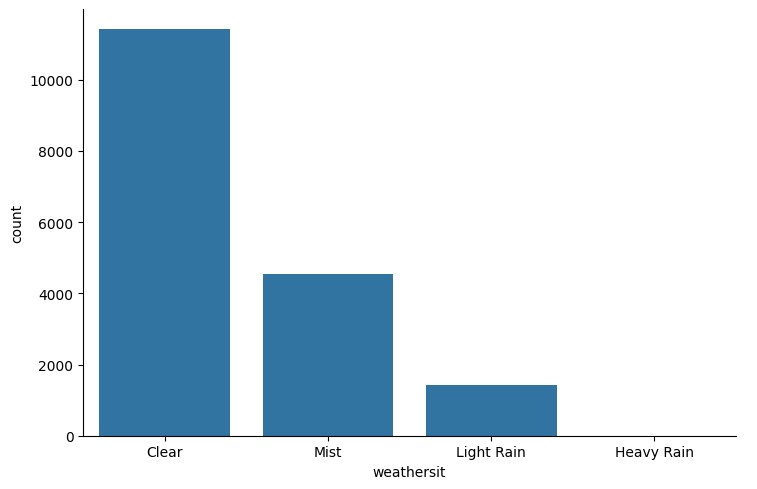

In [ ]:
sns.catplot(x='weathersit', data=data_raw, kind='count', height=5, aspect=1.5)

In [ ]:
pd.value_counts(data_raw['season'])

Summer    4496
Spring    4409
Winter    4242
Fall      4232
Name: season, dtype: int64

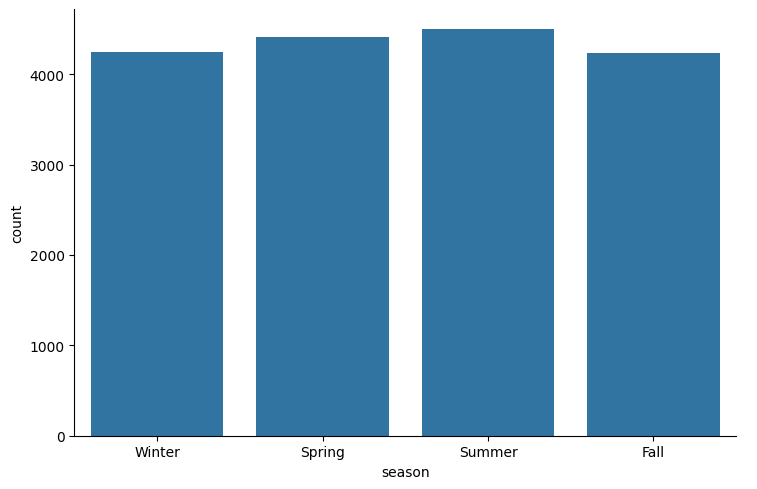

In [ ]:
sns.catplot(x='season', data=data_raw, kind='count', height=5, aspect=1.5)

In [ ]:
pd.value_counts(data_raw['time_of_day'])

Night      6471
Morning    5805
Evening    5103
Name: time_of_day, dtype: int64

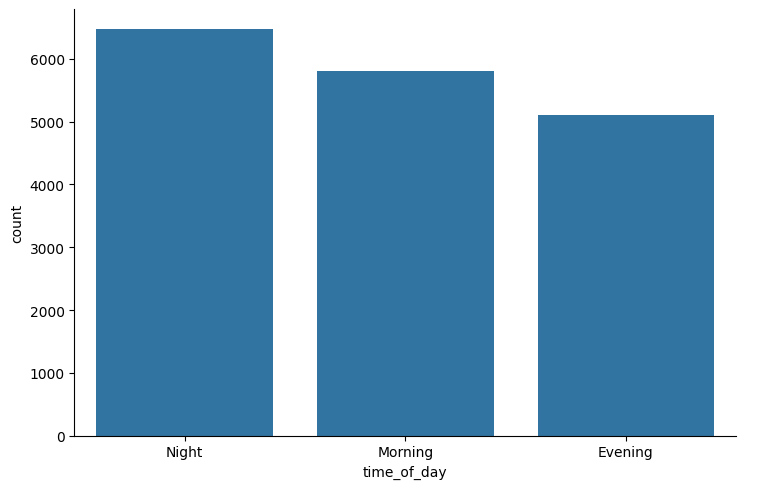

In [ ]:
sns.catplot(x='time_of_day', data=data_raw, kind='count', height=5, aspect=1.5)

In [ ]:
pd.value_counts(data_raw['weekday'])

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

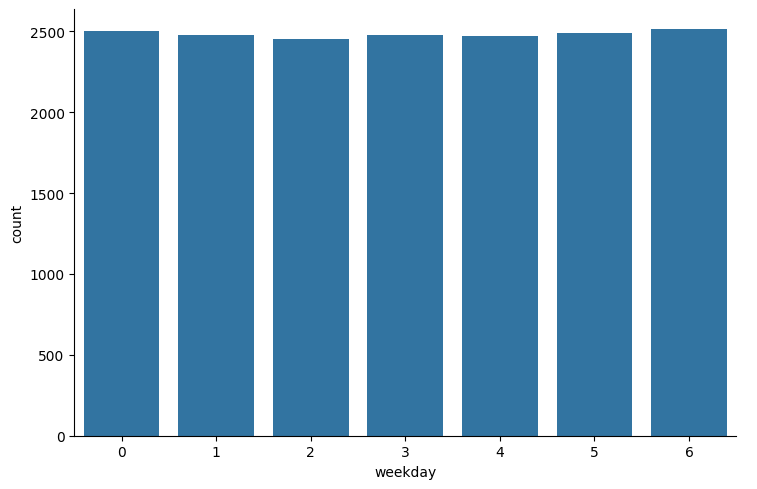

In [ ]:
sns.catplot(x='weekday', data=data_raw, kind='count', height=5, aspect=1.5)

In [ ]:
data.columns.unique()

Index(['season', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'time_of_day'],
      dtype='object')

Eliminar valores ausentes

In [ ]:
data.isna()

,season,weekday,weathersit,temp,atemp,hum,windspeed,cnt,time_of_day
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()


season         0
weekday        0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
cnt            0
time_of_day    0
dtype: int64

<Axes: >

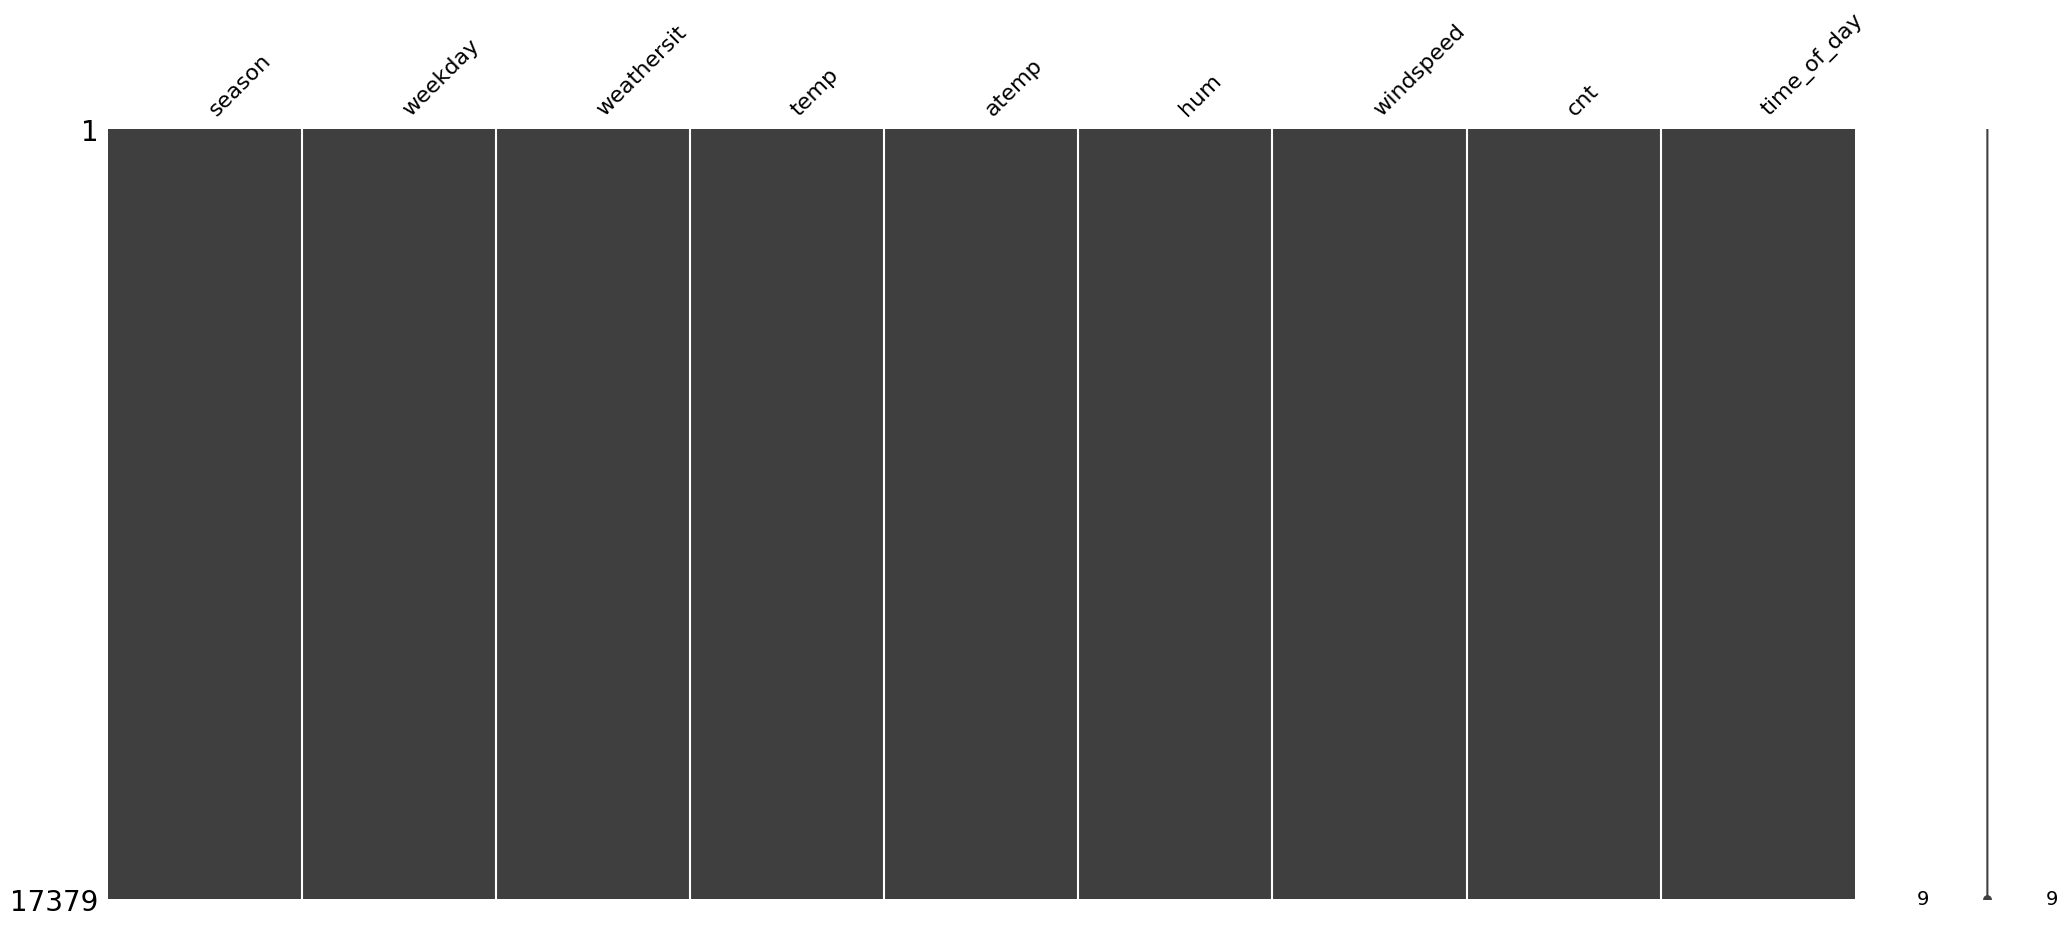

In [ ]:
msno.matrix(data) #visualizar presencia o ausencia de valores faltantes

Eliminacion de duplicados

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

In [ ]:
data.duplicated().sum()

42

In [ ]:
data = data.drop_duplicates()

In [ ]:
x = data.drop(['cnt'], axis=1)
y = data['cnt']

In [ ]:
data.shape

(17337, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17337 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       17337 non-null  object 
 1   weekday      17337 non-null  int64  
 2   weathersit   17337 non-null  object 
 3   temp         17337 non-null  float64
 4   atemp        17337 non-null  float64
 5   hum          17337 non-null  float64
 6   windspeed    17337 non-null  float64
 7   cnt          17337 non-null  int64  
 8   time_of_day  17337 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 1.3+ MB


<ipython-input-24-916a20f101cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat= data_raw[:].corr()


<Axes: >

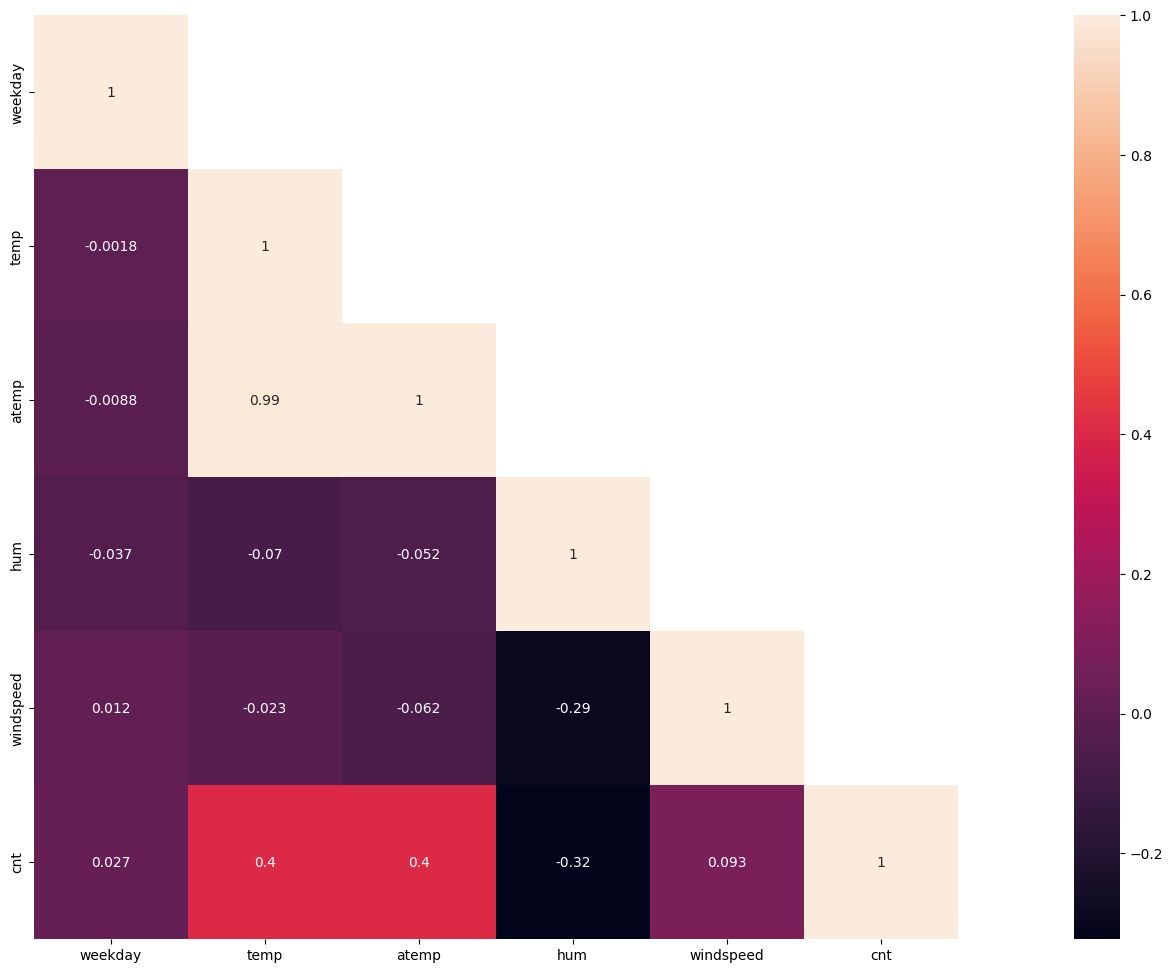

In [ ]:
cor_mat= data_raw[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Transformacion de Variables Categoricas



In [ ]:
data = pd.get_dummies(data, columns=['season', 'weekday', 'weathersit', 'time_of_day'])


In [ ]:
data.shape

(17337, 23)

In [ ]:
data.columns.unique()

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_Clear', 'weathersit_Heavy Rain',
       'weathersit_Light Rain', 'weathersit_Mist', 'time_of_day_Evening',
       'time_of_day_Morning', 'time_of_day_Night'],
      dtype='object')

In [ ]:
data.head()

,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,weekday_0,...,weekday_4,weekday_5,weekday_6,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Rain,weathersit_Mist,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,3.28,3.0014,0.81,0.0,16,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
1,2.34,1.9982,0.80,0.0,40,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
2,2.34,1.9982,0.80,0.0,32,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
3,3.28,3.0014,0.75,0.0,13,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
4,3.28,3.0014,0.75,0.0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1


Visualizacion de algunas varibles

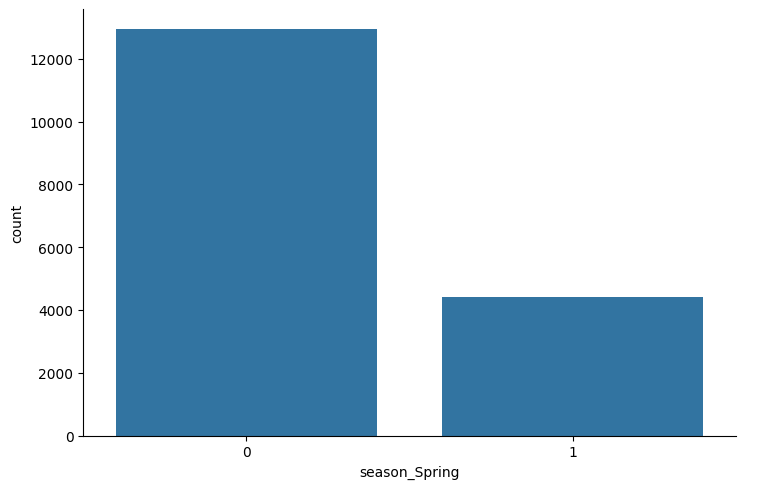

In [ ]:
sns.catplot(x='season_Spring', data=data, kind='count', height=5, aspect=1.5)

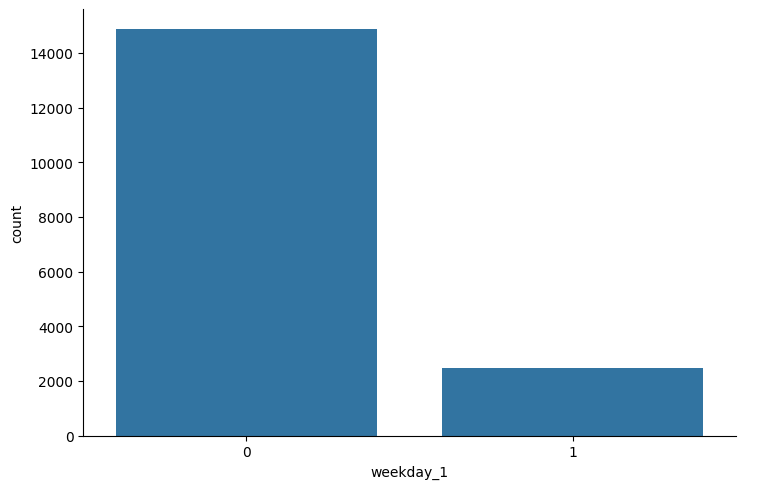

In [ ]:
sns.catplot(x='weekday_1', data=data, kind='count', height=5, aspect=1.5)

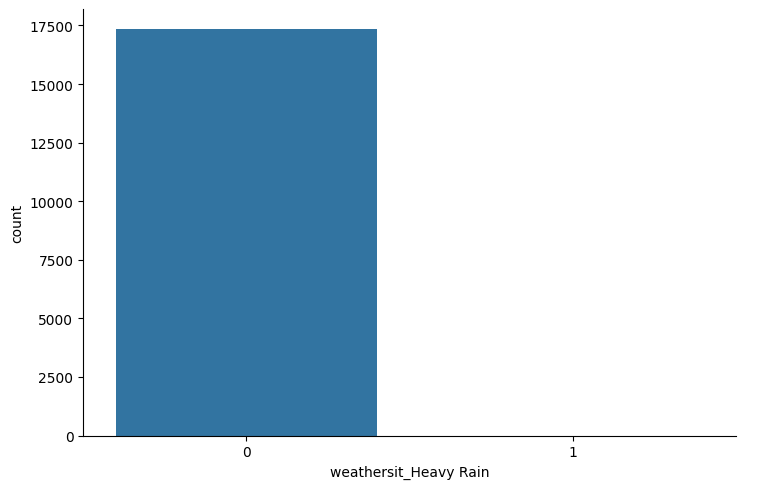

In [ ]:
sns.catplot(x='weathersit_Heavy Rain', data=data, kind='count', height=5, aspect=1.5)

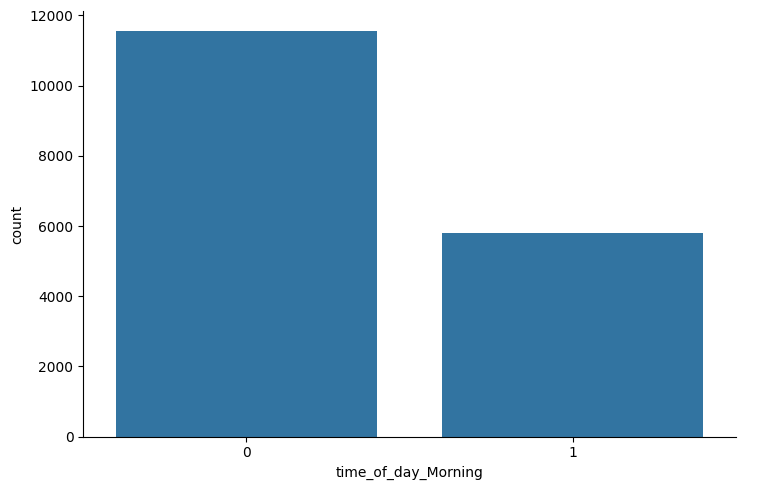

In [ ]:
sns.catplot(x='time_of_day_Morning', data=data, kind='count', height=5, aspect=1.5)

In [ ]:
data.describe()

,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,weekday_0,...,weekday_4,weekday_5,weekday_6,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Rain,weathersit_Mist,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
count,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,...,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000
mean,15.373723,15.419489,0.626924,12.744552,189.865836,0.243468,0.253792,0.258984,0.243756,0.143912,...,0.142239,0.143277,0.144719,0.656919,0.000173,0.081329,0.261579,0.294053,0.334372,0.371575
std,9.046797,11.338895,0.192857,8.196736,181.400275,0.429187,0.435193,0.438089,0.429360,0.351010,...,0.349305,0.350366,0.351828,0.474752,0.013154,0.273348,0.439507,0.455629,0.471784,0.483240
min,-7.060000,-16.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.980000,5.997800,0.480000,7.001500,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.500000,15.996800,0.630000,12.998000,143.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.020000,24.999200,0.780000,16.997900,281.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,39.000000,50.000000,1.000000,56.996900,977.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


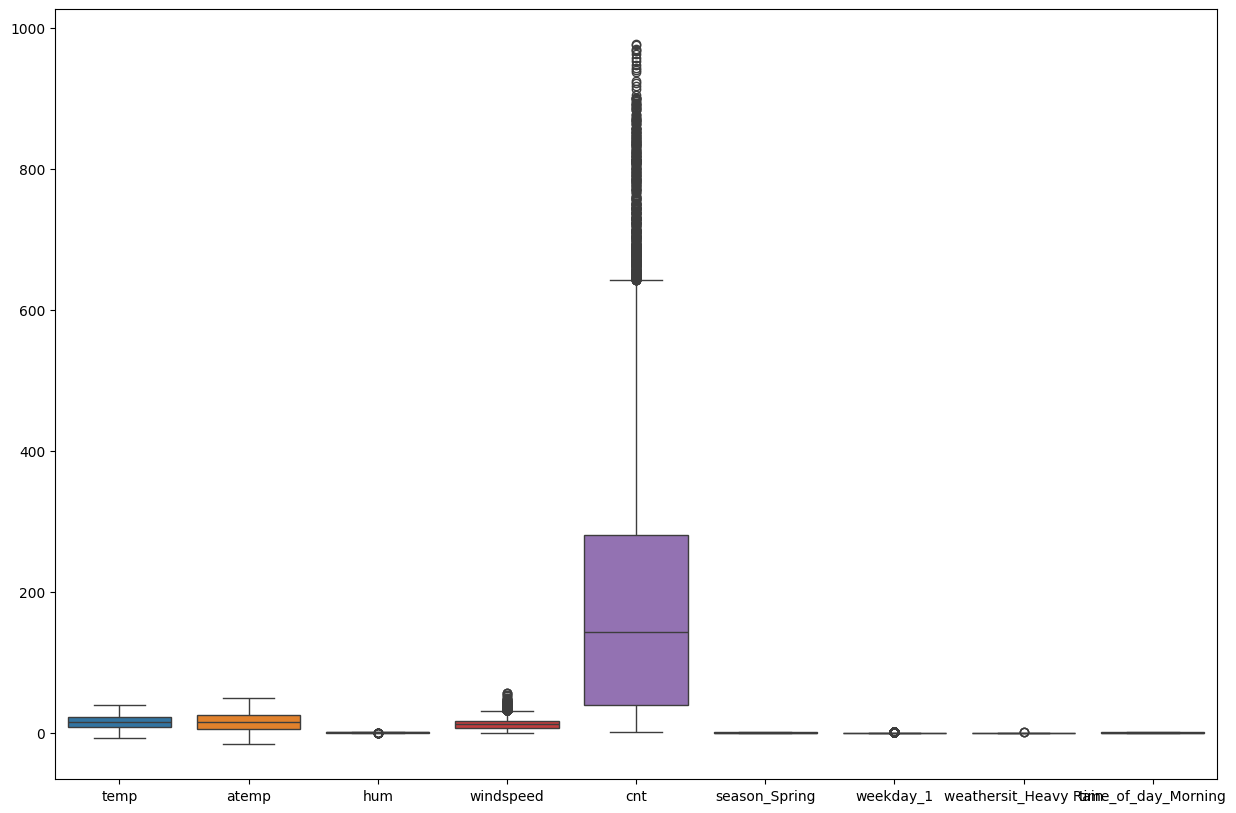

In [ ]:
sns.boxplot(data=data[['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_Spring',
        'weekday_1', 'weathersit_Heavy Rain',
     'time_of_day_Morning'
       ]])
fig=plt.gcf()
fig.set_size_inches(15,10)

Ahora, analizamos los datos con un mapa de calor

<Axes: >

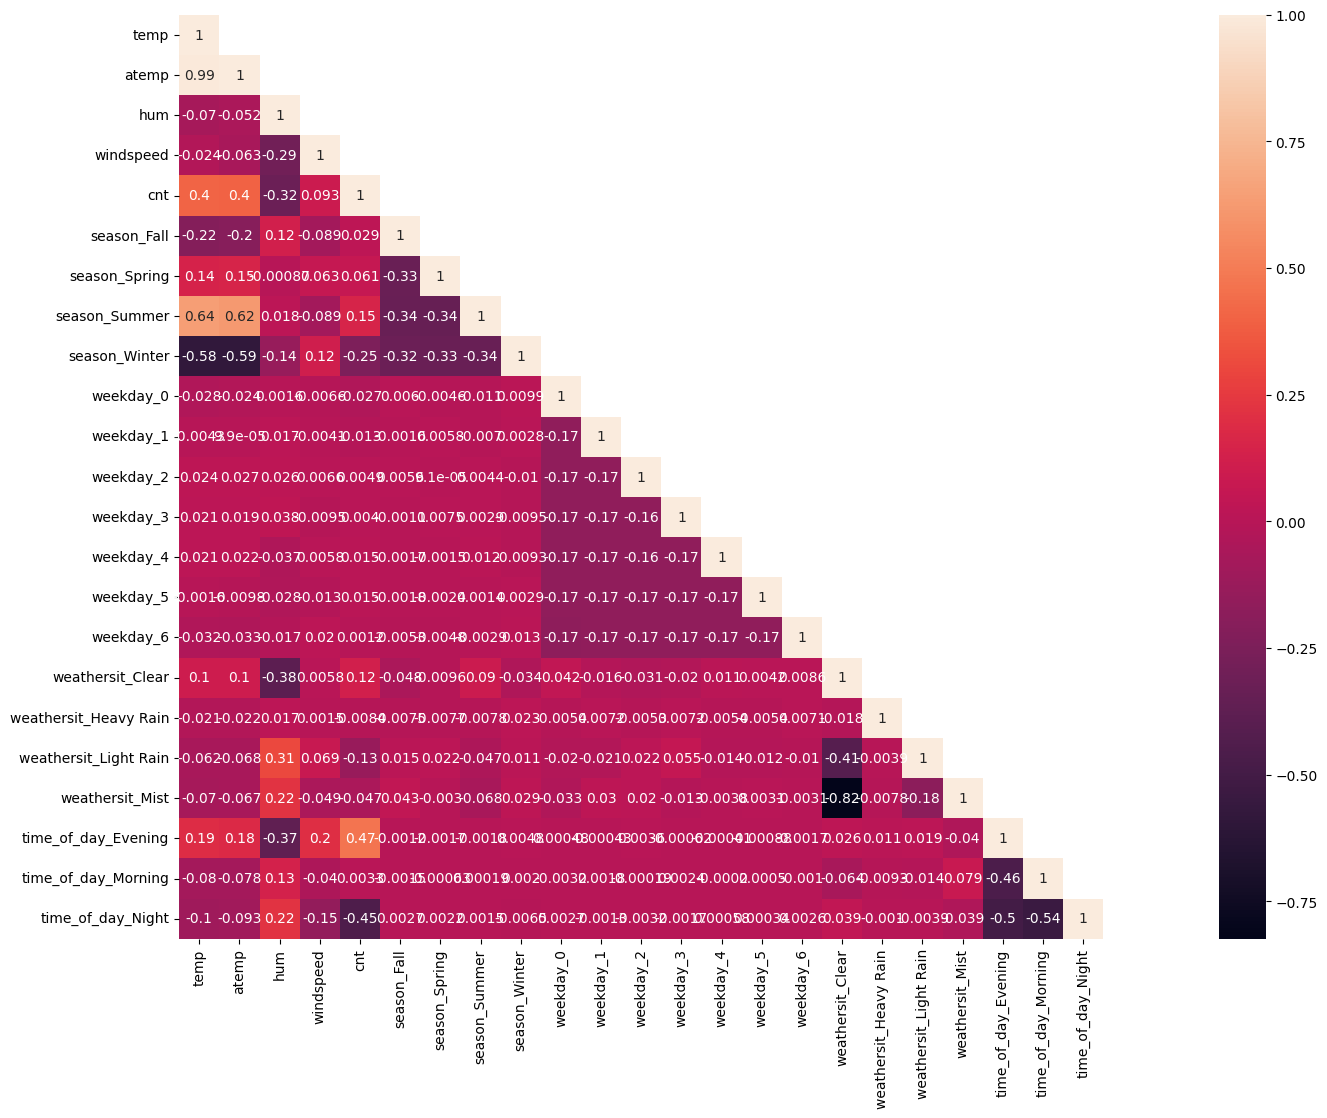

In [ ]:

cor_mat= data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Division de datos

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=77)
train.head()

,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,weekday_0,...,weekday_4,weekday_5,weekday_6,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Rain,weathersit_Mist,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
7697,9.86,9.9974,0.94,15.0013,190,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5830,23.96,26.0024,0.74,11.0014,152,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4589,20.20,22.9994,0.73,12.9980,7,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
6726,17.38,18.0032,0.94,7.0015,90,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6150,17.38,18.0032,0.68,6.0032,180,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
test.head()

,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,weekday_0,...,weekday_4,weekday_5,weekday_6,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Rain,weathersit_Mist,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
15379,9.86,9.9974,0.76,19.0012,51,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1094,11.74,11.9972,0.77,12.9980,272,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
14333,24.90,26.9990,0.65,19.9995,442,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
14602,28.66,34.9982,0.70,12.9980,245,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
11072,10.80,11.0006,0.40,23.9994,163,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


Excluyendo la variable de interes

In [ ]:
x_train = train.drop(['cnt'],axis=1)
y_train = train['cnt']

In [ ]:
x_train.head()

,temp,atemp,hum,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,weekday_0,weekday_1,...,weekday_4,weekday_5,weekday_6,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Rain,weathersit_Mist,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
7697,9.86,9.9974,0.94,15.0013,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5830,23.96,26.0024,0.74,11.0014,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4589,20.20,22.9994,0.73,12.9980,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6726,17.38,18.0032,0.94,7.0015,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6150,17.38,18.0032,0.68,6.0032,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
x_train.info

<bound method DataFrame.info of         temp    atemp   hum  windspeed  season_Fall  season_Spring  \
7697    9.86   9.9974  0.94    15.0013            1              0   
5830   23.96  26.0024  0.74    11.0014            0              0   
4589   20.20  22.9994  0.73    12.9980            0              0   
6726   17.38  18.0032  0.94     7.0015            1              0   
6150   17.38  18.0032  0.68     6.0032            0              0   
...      ...      ...   ...        ...          ...            ...   
4846   25.84  30.0020  0.74     8.9981            0              0   
7849   19.26  20.0030  0.56    12.9980            1              0   
9533    6.10   5.9978  0.70     0.0000            0              0   
8823    8.92   7.0010  0.46    15.0013            0              0   
15097  17.38  18.0032  0.73    12.9980            1              0   

       season_Summer  season_Winter  weekday_0  weekday_1  ...  weekday_4  \
7697               0              0          0          0  ...          0   
5830               1              0          0          1  ...          0   
4589               1              0          0          0  ...          0   
6726               0              0          0          0  ...          0   
6150               1              0          1          0  ...          0   
...              ...            ...        ...        ...  ...        ...   
4846               1              0          0          1  ...          0   
7849               0              0          0          1  ...          0   
9533               0              1          0          0  ...          0   
8823               0              1          1          0  ...          0   
15097              0              0          0          0  ...          0   

       weekday_5  weekday_6  weathersit_Clear  weathersit_Heavy Rain  \
7697           0          0                 0                      0   
5830           0          0                 0                      0   
4589           1          0                 1                      0   
6726           0          0                 0                      0   
6150           0          0                 0                      0   
...          ...        ...               ...                    ...   
4846           0          0                 1                      0   
7849           0          0                 1                      0   
9533           0          0                 0                      0   
8823           0          0                 1                      0   
15097          0          0                 1                      0   

       weathersit_Light Rain  weathersit_Mist  time_of_day_Evening  \
7697                       1                0                    0   
5830                       1                0                    0   
4589                       0                0                    0   
6726                       1                0                    0   
6150                       0                1                    0   
...                      ...              ...                  ...   
4846                       0                0                    0   
7849                       0                0                    1   
9533                       0                1                    0   
8823                       0                0                    0   
15097                      0                0                    0   

       time_of_day_Morning  time_of_day_Night  
7697                     1                  0  
5830                     1                  0  
4589                     0                  1  
6726                     0                  1  
6150                     0                  1  
...                    ...                ...  
4846                     0                  1  
7849                     0                  0  
9533                     0                  1  
8823            

In [ ]:
x_train['season_Fall'].dtype

dtype('uint8')

In [ ]:
y_train.head()

7697    190
5830    152
4589      7
6726     90
6150    180
Name: cnt, dtype: int64

Entrenamiento del modelo

In [ ]:
scaler = RobustScaler()

In [ ]:
columns = x_train.columns
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=columns)

In [ ]:
reg_lineal = LinearRegression().fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns, reg_lineal.coef_))

[('temp', 73.12321900148892),
 ('atemp', 33.029369621804506),
 ('hum', -43.718628019874),
 ('windspeed', -1.4163312053169141),
 ('season_Fall', 39.892861427606064),
 ('season_Spring', 5.323578396081048),
 ('season_Summer', -25.382946288158642),
 ('season_Winter', -19.833493535528497),
 ('weekday_0', -8.558152822323326),
 ('weekday_1', -3.363841194471516),
 ('weekday_2', -1.4500323449019972),
 ('weekday_3', 2.6205690525739342),
 ('weekday_4', 0.903831405188374),
 ('weekday_5', 4.556742077343994),
 ('weekday_6', 5.290883826590542),
 ('weathersit_Clear', 11.365235902466331),
 ('weathersit_Heavy Rain', 14.357048731802644),
 ('weathersit_Light Rain', -33.210329362344204),
 ('weathersit_Mist', 7.488044728075174),
 ('time_of_day_Evening', 92.33667988278852),
 ('time_of_day_Morning', 4.957167791221838),
 ('time_of_day_Night', -97.29384767401042)]

Evaluacion del Modelo de Regresion lineal

In [ ]:
x_test = test.drop(['cnt'],axis=1)
y_test = test['cnt']

In [ ]:
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=columns)

In [ ]:
y_pred = reg_lineal.predict(x_test)

print('------ Modelo de regresión lineal simple----')
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print('R²: %.2f' % r2_score(y_test, y_pred))

------ Modelo de regresión lineal simple----
RMSE: 139.79
MAE: 103.74
R²: 0.42


Ahora Regresion Polinomial

In [ ]:
x = data.drop(['cnt'], axis=1)
y = data['cnt']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

In [ ]:
x_train.head()

,temp,atemp,hum,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,weekday_0,weekday_1,...,weekday_4,weekday_5,weekday_6,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Rain,weathersit_Mist,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
7697,9.86,9.9974,0.94,15.0013,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5830,23.96,26.0024,0.74,11.0014,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4589,20.20,22.9994,0.73,12.9980,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6726,17.38,18.0032,0.94,7.0015,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6150,17.38,18.0032,0.68,6.0032,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
pf_2 = PolynomialFeatures(degree=2)

In [ ]:
x_train_pol2 = pf_2.fit_transform(x_train)
x_train_pol2

array([[ 1.    ,  9.86  ,  9.9974, ...,  1.    ,  0.    ,  0.    ],
       [ 1.    , 23.96  , 26.0024, ...,  1.    ,  0.    ,  0.    ],
       [ 1.    , 20.2   , 22.9994, ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 1.    ,  6.1   ,  5.9978, ...,  0.    ,  0.    ,  1.    ],
       [ 1.    ,  8.92  ,  7.001 , ...,  1.    ,  0.    ,  0.    ],
       [ 1.    , 17.38  , 18.0032, ...,  1.    ,  0.    ,  0.    ]])

In [ ]:
x_train_pol2.shape

(13869, 276)

Estandarizacion

In [ ]:
scaler_pol2 = RobustScaler()
x_train_pol2 = scaler_pol2.fit_transform(x_train_pol2)

Entrenamiento del Modelo Polinomial

In [ ]:
reg_polinomial = LinearRegression().fit(x_train_pol2, y_train)

In [ ]:
x_test_pol2 = pf_2.transform(x_test)

In [ ]:
x_test_pol2 = scaler_pol2.transform(x_test_pol2)

In [ ]:
y_pred = reg_polinomial.predict(x_test_pol2)

print('------ Modelo de regresión polinomial múltiple (grado 2)----')
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print('R²: %.2f' % r2_score(y_test, y_pred))

------ Modelo de regresión polinomial múltiple (grado 2)----
RMSE: 134.62
MAE: 98.82
R²: 0.46


Regresion Polinomial degree 3

In [ ]:
pf_3 = PolynomialFeatures(degree=3)

In [ ]:
x_train_pol3 = pf_3.fit_transform(x_train)

In [ ]:
scaler_pol3 = RobustScaler()
x_train_pol3 = scaler_pol3.fit_transform(x_train_pol3)

In [ ]:
x_train_pol3.shape

(13869, 2300)

In [ ]:
reg_polinomial = LinearRegression().fit(x_train_pol3, y_train)

In [ ]:
x_test_pol3 = pf_3.transform(x_test)
x_test_pol3

array([[ 1.    ,  9.86  ,  9.9974, ...,  0.    ,  0.    ,  1.    ],
       [ 1.    , 11.74  , 11.9972, ...,  0.    ,  0.    ,  0.    ],
       [ 1.    , 24.9   , 26.999 , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 1.    , 24.9   , 26.999 , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    , 25.84  , 28.0022, ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  8.92  ,  7.001 , ...,  0.    ,  0.    ,  0.    ]])

In [ ]:
x_test_pol3 = scaler_pol3.transform(x_test_pol3)

In [ ]:
y_pred = reg_polinomial.predict(x_test_pol3)

print('------ Modelo de regresión polinomial múltiple (grado 3)----')
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print('R²: %.2f' % r2_score(y_test, y_pred))

------ Modelo de regresión polinomial múltiple (grado 3)----
RMSE: 130.45
MAE: 94.73
R²: 0.49


Busqueda de Hiperparametros

In [ ]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(),
    RobustScaler(),
    LinearRegression()
)

In [ ]:
param_grid = {'polynomialfeatures__degree': [2, 3]}

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
modelos_grid = GridSearchCV(polynomial_regression, param_grid, cv=kfold, n_jobs=-1)

In [ ]:
modelos_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('robustscaler', RobustScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'polynomialfeatures__degree': [2, 3]})

In [ ]:
print("Mejor parámetro: ", modelos_grid.best_params_)

Mejor parámetro:  {'polynomialfeatures__degree': 3}


In [ ]:
mejor_modelo = modelos_grid.best_estimator_

In [ ]:
y_pred = mejor_modelo.predict(x_test)

print('------ Modelo de regresión polinomial múltiple----')
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print('R²: %.2f' % r2_score(y_test, y_pred))

------ Modelo de regresión polinomial múltiple----
RMSE: 130.45
MAE: 94.73
R²: 0.49


Ahora con Regresion **Lasso**

In [ ]:
x_train.head()

,temp,atemp,hum,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,weekday_0,weekday_1,...,weekday_4,weekday_5,weekday_6,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Rain,weathersit_Mist,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
7697,9.86,9.9974,0.94,15.0013,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5830,23.96,26.0024,0.74,11.0014,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4589,20.20,22.9994,0.73,12.9980,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6726,17.38,18.0032,0.94,7.0015,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6150,17.38,18.0032,0.68,6.0032,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
y_train.head()

7697    190
5830    152
4589      7
6726     90
6150    180
Name: cnt, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
columns = x_train.columns
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=columns)

In [ ]:
x_train.head()

,temp,atemp,hum,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,weekday_0,weekday_1,...,weekday_4,weekday_5,weekday_6,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Rain,weathersit_Mist,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,0.367347,0.3939,0.94,0.263195,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.673469,0.6364,0.74,0.193018,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.591837,0.5909,0.73,0.228047,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.530612,0.5152,0.94,0.122840,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.530612,0.5152,0.68,0.105325,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=2000)

In [ ]:
param_grid = {'alpha': [1, 2, 3, 4, 5]}

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state = 0)

In [ ]:
modelos_grid = GridSearchCV(lasso, param_grid, cv=kfold, n_jobs=-1)

In [ ]:
modelos_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Lasso(max_iter=2000), n_jobs=-1,
             param_grid={'alpha': [1, 2, 3, 4, 5]})

In [ ]:
print("Mejor parámetro: ", modelos_grid.best_params_)

Mejor parámetro:  {'alpha': 1}


In [ ]:
mejor_modelo = modelos_grid.best_estimator_
list(zip(x_train.columns, mejor_modelo.coef_))

[('temp', 256.8764330364016),
 ('atemp', 0.0),
 ('hum', -120.13870762131647),
 ('windspeed', -0.0),
 ('season_Fall', 37.72745875587575),
 ('season_Spring', 11.751870698715617),
 ('season_Summer', -0.6148732225630713),
 ('season_Winter', -21.39072258266958),
 ('weekday_0', -2.5161496001665573),
 ('weekday_1', -0.0),
 ('weekday_2', -0.0),
 ('weekday_3', 0.0),
 ('weekday_4', 0.0),
 ('weekday_5', 0.0),
 ('weekday_6', 0.0),
 ('weathersit_Clear', 5.676878091587081),
 ('weathersit_Heavy Rain', -0.0),
 ('weathersit_Light Rain', -33.41918934901617),
 ('weathersit_Mist', 0.0),
 ('time_of_day_Evening', 92.14663621011509),
 ('time_of_day_Morning', -0.0),
 ('time_of_day_Night', -100.19111351828909)]

Evaluacion del mejor modelo

In [ ]:
y_predl = mejor_modelo.predict(x_test)

print('------ Modelo de regresión Lasso----')
print("RMSE: %.2f" % mean_squared_error(y_test, y_predl, squared=False))
print("MAE: %.2f" % mean_absolute_error(y_test, y_predl))
print('R²: %.2f' % r2_score(y_test, y_predl))

------ Modelo de regresión Lasso----
RMSE: 4466.27
MAE: 3870.71
R²: -592.39


Tabla Comparativa

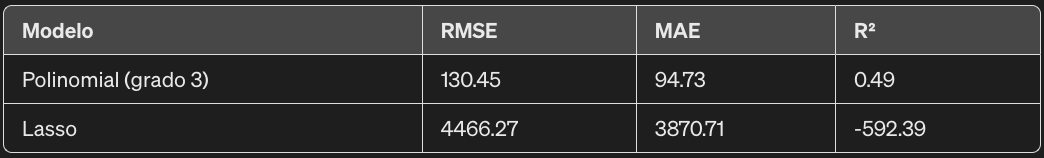

Solo se incluyen resultados del modelo polinomial 3 al hacer valer la anotacion de "con mejores rendimientos"


Basándonos en los coeficientes del modelo Lasso obtenidos durante el entrenamiento, podemos establecer la importancia de cada variable en la predicción, ya que durante el proceso algunas variables seran forzadas a cero.
Los coeficientes son los siguientes:

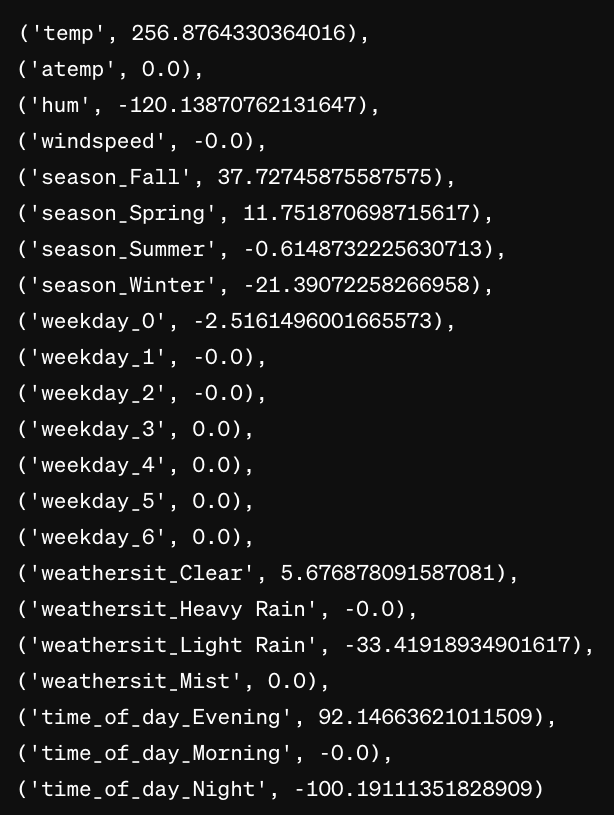

Variables más importantes para la predicción:

'temp': Con un coeficiente de 256.8764330364016, esta variable es la más importante para la predicción del modelo. Implica que un aumento en la temperatura está asociado positivamente con un aumento en el conteo de alquiler de bicicletas.

'hum': El coeficiente de -120.13870762131647 indica que la humedad tiene un impacto negativo en el conteo de bicicletas. A medida que aumenta la humedad, el conteo de alquiler bicicletas tiende a disminuir.

'time_of_day_Evening': Con un coeficiente de 92.14663621011509, sugiere que las horas de la tarde tienen una influencia positiva significativa en el conteo de alquiler de bicicletas.

'time_of_day_Night' y 'weathersit_Light Rain': Estas variables tienen impactos negativos significativos en el conteo de alquiler de bicicletas, con coeficientes de -100.19111351828909 y -33.41918934901617, respectivamente.

Las variables con coeficientes exactamente igual a 0.0, como 'atemp', 'windspeed', 'weekday_1', 'weekday_2', 'weekday_3', 'weathersit_Heavy Rain', 'weathersit_Mist', y 'time_of_day_Morning', son consideradas no importantes por el modelo Lasso para la predicción del conteo de bicicletas. Esto significa que el modelo ha determinado que estas variables no aportan información útil para predecir el objetivo.



Incluyendo RMSE-

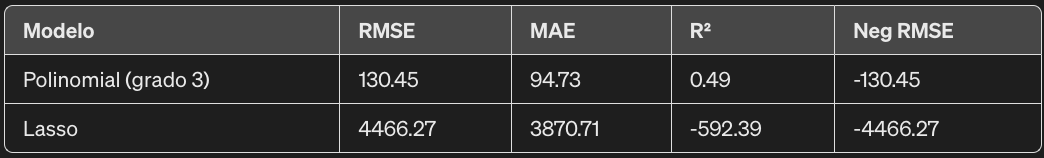

Neg RMSE: Esta columna muestra el RMSE negativo para cada modelo, lo cual es útil cuando se utilizan métodos de selección de modelos en scikit-learn que maximizan una puntuación. El modelo de regresión polinomial tiene un 'neg_root_mean_squared_error' de -130.45, mientras que el modelo de regresión Lasso tiene un valor mucho más negativo de -4466.27, reflejando el peor rendimiento de este último en términos de RMSE.
La inclusión del 'neg_root_mean_squared_error' en la evaluación de modelos ayuda a contextualizar los resultados dentro de procesos automatizados de selección de modelos que buscan maximizar la métrica de evaluación. Esto confirma que el modelo de regresión polinomial múltiple de grado 3 es superior al modelo Lasso en este caso específico, no solo en términos de las métricas estándar de RMSE, MAE y R², sino también cuando consideramos la convención de optimización de scikit-learn utilizando 'neg_root_mean_squared_error'.

# **Analisis de resultados**

**¿Cuál es el grado de la transformación polinomial que fue seleccionado utilizando la técnica de validación?**

Modelo polinomial Grado 3

**¿Cuál fue el valor de α que fue seleccionado utilizando la técnica de validación para la regresión Lasso?**

El parametro de regularizacion fue α = 1

**A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?**


A partir de la tabla comparativa y los valores proporcionados, el modelo de regresión polinomial múltiple de grado 3 ofrece un mejor rendimiento sobre el conjunto de test en comparación con el modelo de regresión Lasso. Esto se deduce de las métricas de rendimiento, donde el modelo polinomial tiene un RMSE significativamente más bajo, un MAE más bajo y un R² positivo en comparación con el R² extremadamente negativo del modelo Lasso.

Interpretación de las Métricas de Rendimiento:
El RMSE y MAE más bajos del modelo polinomial indican que las predicciones están más cerca de los valores reales.
Un R² de 0.49 en el modelo polinomial, aunque no es muy alto, indica que el modelo puede explicar aproximadamente el 49% de la variabilidad de los datos, lo cual es significativamente mejor en comparación con el modelo Lasso, cuyo R² negativo sugiere un rendimiento peor que un modelo trivial que siempre predice la media de los datos.

**¿Cuáles variables fueron seleccionadas con el modelo Lasso? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.**

Interpretacion Modelo Lasso respecto al problema

La selección de 'temp' y 'hum' sugiere que las condiciones climáticas son factores importantes que afectan el resultado predicho (por ejemplo, el conteo de alquiler de bicicletas).
La importancia de las variables relacionadas con las estaciones ('season_Fall', 'season_Spring', 'season_Winter') y el tiempo del día ('time_of_day_Evening', 'time_of_day_Night') indica que la demanda de bicicletas puede variar significativamente según la temporada y el momento del día.
La selección de variables relacionadas con el clima ('weathersit_Clear', 'weathersit_Light Rain') refuerza la idea de que las condiciones meteorológicas influyen en la decisión de usar bicicletas.

Este análisis podría ayudar a tomar decisiones relacionadas con la planificación de recursos y la gestión de inventario de bicicletas, asegurando que haya suficientes bicicletas disponibles durante los momentos de alta demanda y ajustando las estrategias de mantenimiento o promoción según la temporada y las condiciones climáticas.